In [99]:
from torch.distributed.algorithms.ddp_comm_hooks.ddp_zero_hook import hook_with_zero_step
!pip install pandas-datareader

In [100]:
import pandas as pd
import pandas_ta as ta
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.extensions.autoreload import append_obj
from networkx import fast_gnp_random_graph
from sklearn.preprocessing import StandardScaler
from datetime import date, datetime
import yfinance as yf
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


In [101]:
#Dwonloading historical data for Apple Inc. (AAPL), Microsoft Corp. (MSFT), and Google LLC (GOOGL) to files
tickers = ['AAPL', 'GOOGL', 'MSFT']

for share in tickers:
    share_data = yf.download(share, start='2000-01-01', end=date.today().strftime('%Y-%m-%d'))
    
    if isinstance(share_data.columns, pd.MultiIndex):
        share_data.columns = share_data.columns.get_level_values(0)
        
    share_data.reset_index(inplace=True)    
    share_data.rename(columns={'Date':'DATE'}, inplace=True)
    share_data.to_csv(f'prices/historical_{share}_data.csv', index=False)
    
print(share_data.head(10))

/var/folders/rs/rx9snnk15ss4_d166y1sz82h0000gn/T/ipykernel_5746/1244314263.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  share_data = yf.download(share, start='2000-01-01', end=date.today().strftime('%Y-%m-%d'))
[*********************100%***********************]  1 of 1 completed
/var/folders/rs/rx9snnk15ss4_d166y1sz82h0000gn/T/ipykernel_5746/1244314263.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  share_data = yf.download(share, start='2000-01-01', end=date.today().strftime('%Y-%m-%d'))
[*********************100%***********************]  1 of 1 completed
/var/folders/rs/rx9snnk15ss4_d166y1sz82h0000gn/T/ipykernel_5746/1244314263.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  share_data = yf.download(share, start='2000-01-01', end=date.today().strftime('%Y-%m-%d'))
[*********************100%***********************]  1 of 1 completed


Price       DATE      Close       High        Low       Open    Volume
0     2000-01-03  35.601456  36.231401  34.207940  35.849616  53228400
1     2000-01-04  34.398842  35.773268  34.284306  34.685181  54119000
2     2000-01-05  34.761528  35.544187  33.406191  33.940690  64059600
3     2000-01-06  33.597080  34.780614  33.100760  34.265204  54976600
4     2000-01-07  34.036118  34.284278  32.776228  33.177102  62013600
5     2000-01-10  34.284298  34.723351  34.017048  34.646994  44963600
6     2000-01-11  33.406185  34.895147  33.196203  34.055220  46743600
7     2000-01-12  32.318104  33.253477  31.898140  33.138942  66532400
8     2000-01-13  32.928955  33.177115  31.000941  31.879046  83144000
9     2000-01-14  34.284298  34.799708  32.299016  32.738068  73416400


In [102]:
MSFT_data = yf.download('MSFT', start='2000-01-01')

if isinstance(MSFT_data.columns, pd.MultiIndex):
    MSFT_data.columns = MSFT_data.columns.get_level_values(0)
    
### RSI
MSFT_data.ta.rsi(length=14, append=True)


### MACD
MSFT_data.ta.macd(fast=12, slow=26, signal=9, append=True)

### ATR 
MSFT_data.ta.atr(length=14, append=True)

### Bollinger Bands
MSFT_data.ta.bbands(length=20,std=2, append=True)

MSFT_data['Target'] = (MSFT_data['Close'].shift(-1) > MSFT_data['Close']).astype(int)

MSFT_data.dropna(inplace=True)

MSFT_data.reset_index(inplace=True)
MSFT_data.rename(columns={'Date':'DATE'}, inplace=True)
print(MSFT_data.head())

MSFT_data.to_csv('stock market data/ MSFT_data.csv', index=False)


/var/folders/rs/rx9snnk15ss4_d166y1sz82h0000gn/T/ipykernel_5746/2897544272.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  MSFT_data = yf.download('MSFT', start='2000-01-01')
[*********************100%***********************]  1 of 1 completed

Price       DATE      Close       High        Low       Open    Volume  \
0     2000-02-18  29.034758  30.561898  28.977490  30.542809  79063000   
1     2000-02-22  28.652956  29.664686  28.347528  29.053830  66296200   
2     2000-02-23  28.786592  29.244735  28.118469  28.557521  75847200   
3     2000-02-24  28.939308  29.282915  28.099381  28.786594  69733200   
4     2000-02-25  27.889399  28.924991  27.641238  28.920218  65301400   

Price     RSI_14  MACD_12_26_9  MACDh_12_26_9  MACDs_12_26_9   ATRr_14  \
0      31.629589     -0.866585      -0.218359      -0.648226  1.314920   
1      30.545664     -0.966703      -0.254782      -0.711921  1.315080   
2      31.431397     -1.023467      -0.249236      -0.774231  1.301593   
3      32.490917     -1.044093      -0.215890      -0.828203  1.293160   
4      29.155451     -1.132109      -0.243125      -0.888984  1.293511   

Price  BBL_20_2.0_2.0  BBM_20_2.0_2.0  BBU_20_2.0_2.0  BBB_20_2.0_2.0  \
0           28.692146       30.989486

        DATE  FEDFUNDS
0 2000-01-01      5.45
1 2000-02-01      5.73
2 2000-03-01      5.85
3 2000-04-01      6.02
4 2000-05-01      6.27


Text(0.5, 1.0, 'Fed Funds Rate')

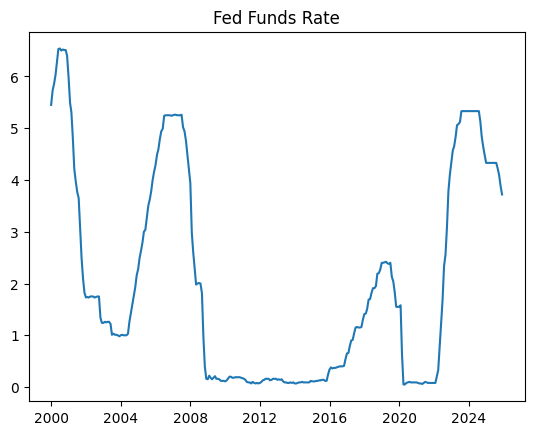

In [103]:
## Loading macro economic data
### need to install pandas-datareader 

### Fed Funds Rate (pol: Stopy procentowe)

FEDFUNDS = web.DataReader('FEDFUNDS', 'fred', start='2000-01-01', end=date.today().strftime('%Y-%m-%d'))
FEDFUNDS.reset_index(inplace=True)

print(FEDFUNDS.head())
FEDFUNDS.to_csv('Macroeconomic data/ FEDFUNDS.csv', index=False)

plt.plot(FEDFUNDS['DATE'], FEDFUNDS['FEDFUNDS'])
plt.title('Fed Funds Rate')
                               

        DATE  DGS10
0 2000-01-03   6.58
1 2000-01-04   6.49
2 2000-01-05   6.62
3 2000-01-06   6.57
4 2000-01-07   6.52


Text(0.5, 1.0, 'DGS10')

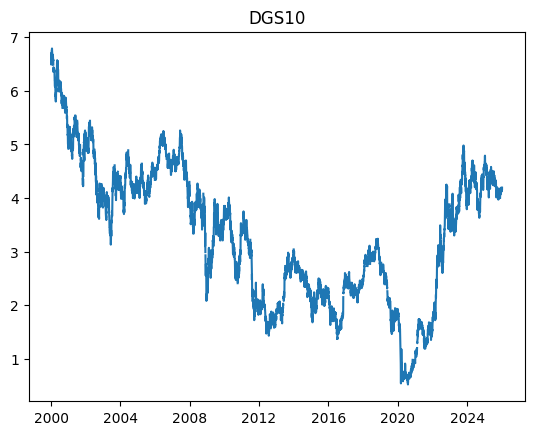

In [104]:
### Market Yield on U.S. Treasury Securities at 10-Year Constant Maturity, Quoted on an Investment Basis (pol: Rentowność Obligacji 10-letnich)

DGS10 = web.DataReader('DGS10', 'fred', start='2000-01-01', end=date.today().strftime('%Y-%m-%d'))
DGS10.reset_index(inplace=True)
print(DGS10.head())
DGS10.to_csv('Macroeconomic data/ DGS10.csv', index=False)
plt.plot(DGS10['DATE'], DGS10['DGS10'])
plt.title('DGS10')

        DATE    CPI
0 2000-01-01  169.3
1 2000-02-01  170.0
2 2000-03-01  171.0
3 2000-04-01  170.9
4 2000-05-01  171.2
5 2000-06-01  172.2
6 2000-07-01  172.7
7 2000-08-01  172.7
8 2000-09-01  173.6
9 2000-10-01  173.9


Text(0.5, 1.0, 'CPI')

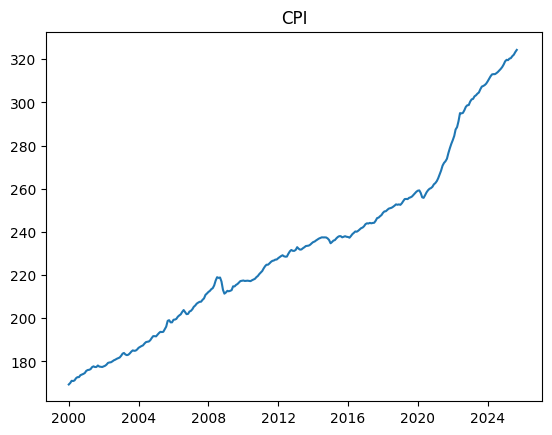

In [105]:
### CPI (pol: Wskaznik inflacji)

CPI = web.DataReader("CPIAUCSL", 'fred', start='2000-01-01', end=date.today().strftime('%Y-%m-%d'))
CPI.reset_index(inplace=True)
CPI.rename(columns={'CPIAUCSL': 'CPI'}, inplace=True)
print(CPI.head(10))
CPI.to_csv('Macroeconomic data/ CPI.csv', index=False)
plt.plot(CPI['DATE'], CPI['CPI'])
plt.title('CPI')

        DATE  Dollar_idx
0 2006-01-02    101.4155
1 2006-01-03    100.7558
2 2006-01-04    100.2288
3 2006-01-05    100.2992
4 2006-01-06    100.0241
5 2006-01-09    100.1794
6 2006-01-10    100.1436
7 2006-01-11     99.8710
8 2006-01-12    100.0643
9 2006-01-13     99.9675


Text(0.5, 1.0, 'Dollar Index')

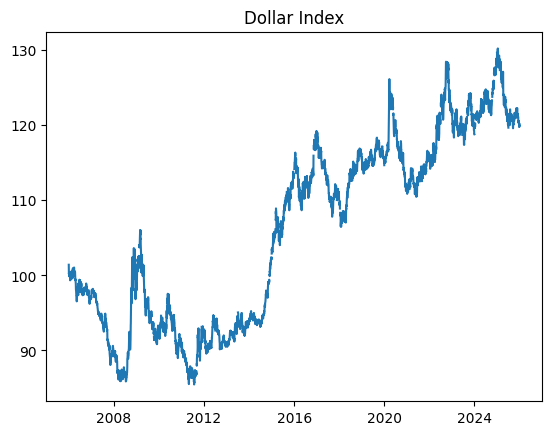

In [106]:
### Dollar index 

Dollar_idx = web.DataReader('DTWEXBGS', 'fred', start='2000-01-01', end=date.today().strftime('%Y-%m-%d'))
Dollar_idx.reset_index(inplace=True)
Dollar_idx.rename(columns={'DTWEXBGS': 'Dollar_idx'}, inplace=True)
print(Dollar_idx.head(10))
Dollar_idx.to_csv('Macroeconomic data/ Dollar_idx.csv', index=False)
plt.plot(Dollar_idx['DATE'], Dollar_idx['Dollar_idx'])
plt.title('Dollar Index')


Text(0.5, 1.0, 'All Macroeconomic datasets plots')

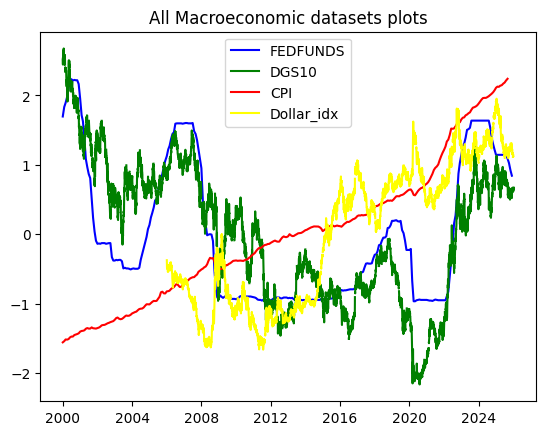

In [107]:
### Setting the same data time for all data

macroeconomic_datasets = [FEDFUNDS, DGS10, CPI, Dollar_idx]
labels = ['FEDFUNDS', 'DGS10', 'CPI', 'Dollar_idx']
plot_colors = ['blue', 'green', 'red', 'yellow', 'black']
scaler = StandardScaler()

for idx, dataset in enumerate(macroeconomic_datasets):
    dataset.sort_values('DATE', inplace=True)
    dataset.reset_index(drop=True, inplace=True)
    dataset[labels[idx] + "_scaled"] = scaler.fit_transform(dataset[[labels[idx]]])
    plt.plot(dataset['DATE'], dataset[labels[idx] + '_scaled'], color=plot_colors[idx])
    dataset.drop(labels[idx] + '_scaled', inplace=True, axis=1)
plt.legend(labels)
plt.title('All Macroeconomic datasets plots')



In [108]:
## FEAR INDEX


### VIX < 20 -> Relative calm on the stock market
### VIX 20 -30 -> Increased volatility, uncertainty.
### VIX > 30 -> Panic on the stock market 


start_date = datetime(year=2000, month=1, day=1)
end_date = date.today().strftime('%Y-%m-%d')
fear_idx = yf.download(tickers= '^VIX',
                   start=start_date,
                   end=end_date,
                   auto_adjust=True,
                   progress=False,
                   interval="1d")
fear_idx.columns = [col[0] for col in fear_idx.columns]
fear_idx = pd.DataFrame(fear_idx)
fear_idx['VIX_percent'] = fear_idx['Close'].pct_change()
fear_idx.dropna(inplace=True)
fear_idx['Is_Panic'] = (fear_idx['Close'] > 30).astype(int)
fear_idx['Is_Calm'] = (fear_idx['Close'] < 20).astype(int)
fear_idx['Is_Uncertain'] = ((fear_idx['Close'] >= 20) & (fear_idx['Close'] <= 30)).astype(int)

fear_idx.reset_index(inplace=True)
fear_idx.rename(columns={'Date':'DATE'}, inplace=True)
fear_idx.to_csv('fear and sentiment data/ fear_idx.csv', index=False)
fear_idx.head()

,DATE,Close,High,Low,Open,Volume,VIX_percent,Is_Panic,Is_Calm,Is_Uncertain
0,2000-01-04,27.010000,27.180000,24.799999,24.940001,0,0.115655,0,0,1
1,2000-01-05,26.410000,29.000000,25.850000,27.980000,0,-0.022214,0,0,1
2,2000-01-06,25.730000,26.709999,24.700001,26.680000,0,-0.025748,0,0,1
3,2000-01-07,21.719999,25.170000,21.719999,25.139999,0,-0.155849,0,0,1
4,2000-01-10,21.709999,22.490000,21.360001,21.889999,0,-0.000460,0,0,1


In [109]:
### FINANCIAL NEWS

financial_sentiment = web.DataReader('USEPUINDXD', 'fred', start='2000-01-01', end=date.today().strftime('%Y-%m-%d'))
financial_sentiment.reset_index(inplace=True)
print(financial_sentiment.head())
financial_sentiment.to_csv('fear and sentiment data/ financial_sentiment.csv', index=False)

        DATE  USEPUINDXD
0 2000-01-01       68.04
1 2000-01-02      119.36
2 2000-01-03       35.73
3 2000-01-04      109.31
4 2000-01-05      123.22


In [110]:
GOOGL = pd.read_csv('prices/historical_GOOGL_data.csv')
AAPL = pd.read_csv('prices/historical_AAPL_data.csv')

columns = AAPL.columns
columns = columns[1:]

for c in columns:
    GOOGL.rename(columns={c: c+'_GOOGL'}, inplace=True)
    AAPL.rename(columns={c: c+'_AAPL'}, inplace=True)
        

In [118]:
### MERGE ALL DATASETS TOGETHER
datasets = [FEDFUNDS, DGS10, CPI, Dollar_idx, financial_sentiment, fear_idx, AAPL, GOOGL]

data = MSFT_data.copy()
for dataset in datasets:
    dataset['DATE'] = pd.to_datetime(dataset['DATE'])
    data = pd.merge(data, dataset, on='DATE', how='left')

features = [col for col in data.columns if col not in ['Target', 'DATE']]
data[features] = data[features].shift(1) #model needs to see data from yesterday
data.dropna(inplace=True)
    
    

print(data.head(10))

           DATE    Close_x     High_x      Low_x     Open_x     Volume_x  \
1496 2006-02-02  19.551802  19.572719  19.356562  19.496018   68448800.0   
1515 2006-03-02  18.988365  19.030345  18.855434  18.876422   53061200.0   
1557 2006-05-02  16.994383  17.491130  16.854453  17.015371  174800900.0   
1579 2006-06-02  16.028158  16.042206  15.887684  15.971968   80230800.0   
1621 2006-08-02  16.849936  16.997435  16.751604  16.871007   49168700.0   
1644 2006-09-05  18.216171  18.307815  18.075179  18.251419   31594600.0   
1686 2006-11-02  20.309900  20.436793  20.232356  20.288752   75895900.0   
1707 2006-12-04  20.598623  20.725949  20.443001  20.676433   72257000.0   
1747 2007-02-02  21.617233  21.886035  21.482834  21.815297   55355800.0   
1766 2007-03-02  19.938917  20.109274  19.683381  19.747265   80175700.0   

         RSI_14  MACD_12_26_9  MACDh_12_26_9  MACDs_12_26_9  ...  Close_AAPL  \
1496  66.302687      0.144463       0.119667       0.024796  ...    2.261923   
151

In [121]:
### CLEANING DATA

data.dropna(inplace=True)
data.ffill(inplace=True)
columns = MSFT_data.columns[1:6]
print(columns)
for c in columns:
    data.rename(columns={c+'_x': c+'_MSFT'}, inplace=True)
    data.rename(columns={c+'_y': c+'_VIX'}, inplace=True)
    
data.drop('Volume_VIX', axis=1, inplace=True)

print(data.describe())

data.to_csv('all_data.csv', index=False)

Index(['Close', 'High', 'Low', 'Open', 'Volume'], dtype='object', name='Price')
                                DATE  Close_MSFT   High_MSFT    Low_MSFT  \
count                            152  152.000000  152.000000  152.000000   
mean   2015-11-27 20:31:34.736841984  118.960350  120.228358  117.745850   
min              2006-02-02 00:00:00   13.589230   14.233817   13.366259   
25%              2011-01-17 12:00:00   21.333748   21.402475   21.052006   
50%              2016-02-16 12:00:00   46.652214   46.701027   45.961835   
75%              2020-12-17 12:00:00  218.682823  220.354744  216.439813   
max              2025-08-04 00:00:00  522.272339  533.921354  519.033734   
std                              NaN  132.703384  134.273370  131.379606   

        Open_MSFT   Volume_MSFT      RSI_14  MACD_12_26_9  MACDh_12_26_9  \
count  152.000000  1.520000e+02  152.000000    152.000000     152.000000   
mean   118.956491  4.522218e+07   55.150517      0.893903       0.100275   
min    

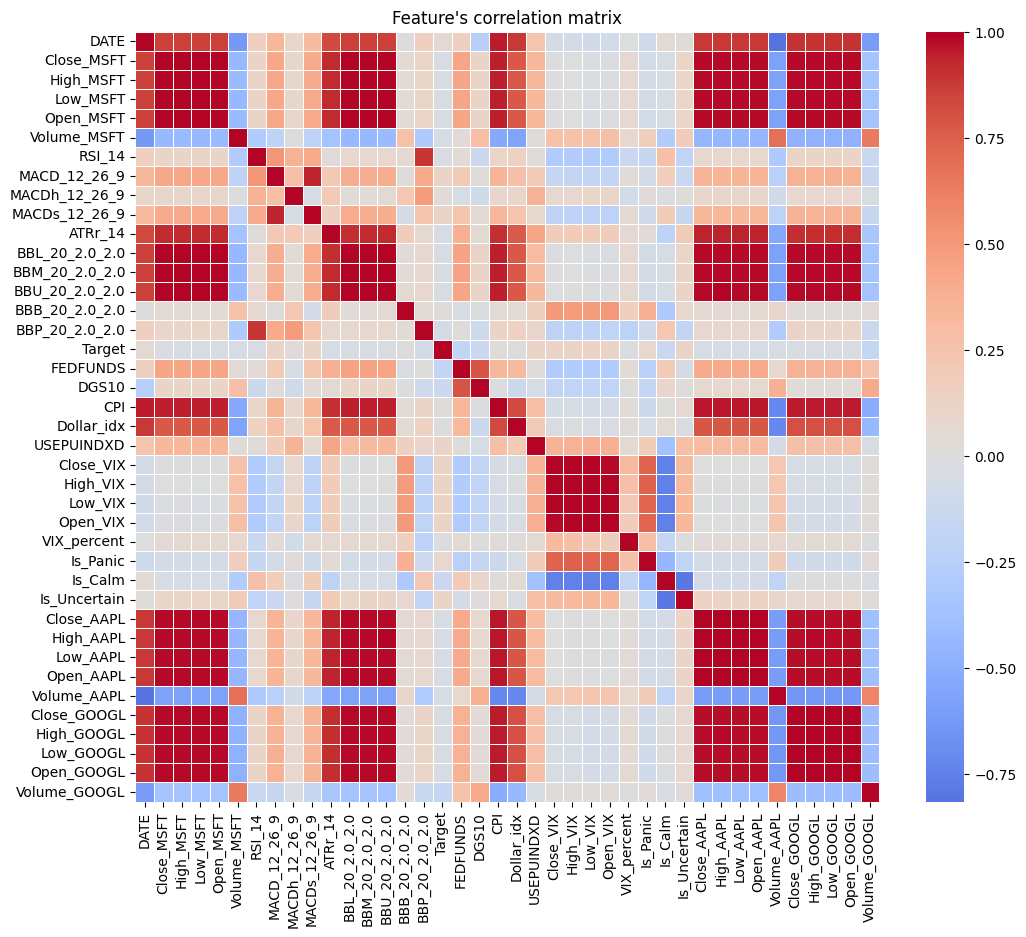

In [122]:
#### HEATMAP OF CORRELACTION  MATRIX

corr_matrix = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, 
            annot=False,     
            cmap='coolwarm',    
            center=0, 
            linewidths=.5)

plt.title("Feature's correlation matrix")
plt.savefig('Feature_corr_matrix.png')
plt.show()